In [9]:
# Set up the imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [10]:
# Define the function and its derivative
def func(x):
    return x[0]**4 - 16*x[0]**3 + 96*x[0]**2 - 256*x[0] + x[1]**2 - 4*x[1] + 262

def derivative(x):
    return np.array([4*x[0]**3 - 48*x[0]**2 + 192*x[0] - 256, 2*x[1] - 4])

start_point = np.array([-5, -5])
learning_rate = 0.001

# xlim3 =  [-10, 10]
# ylim3 =  [-10, 10]
# def f3(x, y):
#     return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

# def df3_dx(x, y):
#     return 4*x**3 - 48*x**2 + 192*x - 256

# def df3_dy(x, y):
#     return 2*y - 4


<IPython.core.display.Javascript object>


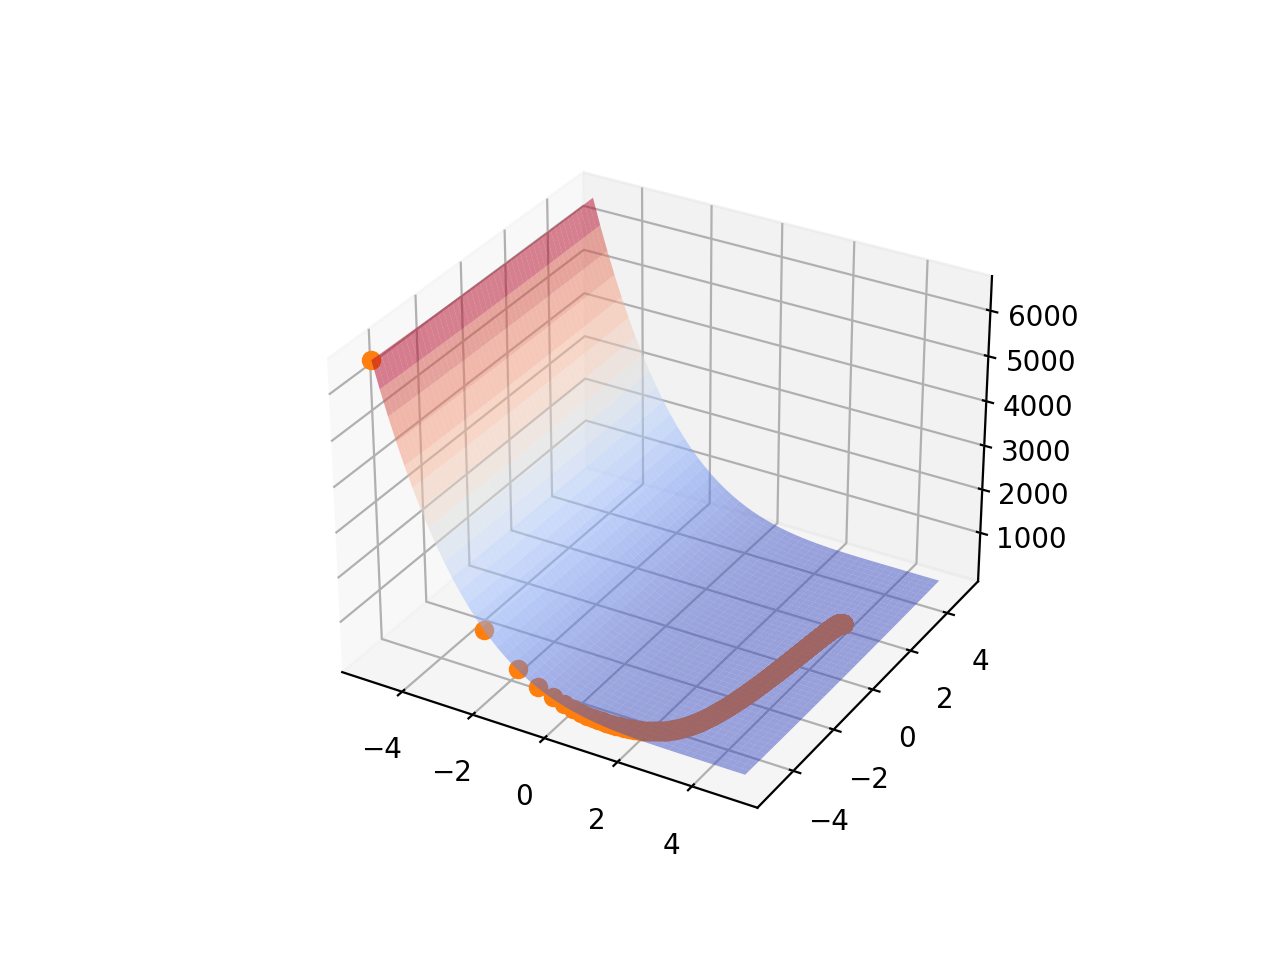

x:3.888244000813805,y:1.9999999858579973,z:2.0001559851959883


In [12]:
 # Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xline_max,xline_min = start_point[0], -start_point[0]
yline_max,yline_min = start_point[1], -start_point[1]

x_grid, y_grid = np.meshgrid(np.linspace(xline_min, xline_max, 50), np.linspace(yline_min, yline_max, 50))
z_grid = np.array([[func([x, y]) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(x_grid, y_grid)])

# Set up the plot data
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=0.5)
line, = ax.plot([], [], [], 'o', lw=2)

def animate(i, path):
        # Update the line data
        line.set_data(path[:i, 0], path[:i, 1])
        line.set_3d_properties(func(path[:i, :].T))
        return line,

def gradient_descent_multi_variables(func, derivative, start_point, learning_rate, max_iters=10000, error_margin=1e-6):
        path = [start_point]
        for i in range(max_iters):
            current_point = path[-1]
            gradient = derivative(current_point)
            new_point = current_point - learning_rate * gradient
            if np.linalg.norm(new_point - current_point) < error_margin:
                break
            path.append(new_point)
        return np.array(path)
    
    
path = gradient_descent_multi_variables(func, derivative, start_point, learning_rate)
anim = FuncAnimation(fig, animate, frames=len(path) + 1, interval=10, blit=True, fargs=(path,))

# Assign the animation to a variable and show the plot
display_animation = anim
plt.show()
print(f'x:{path[-1][0]},y:{path[-1][1]},z:{func(path[-1])}')